In [1]:
from SimulationDataset import *

import matplotlib.pyplot as mpl

Examine the spatial distribution of detector hits, if they cross the full detector from the origin crystal Lu decay

Re-using previous simulation
862122.0 events loaded (1000000 simulated) with average 1.1196130014081533 hits/event
Detector-crossing hits:  3067


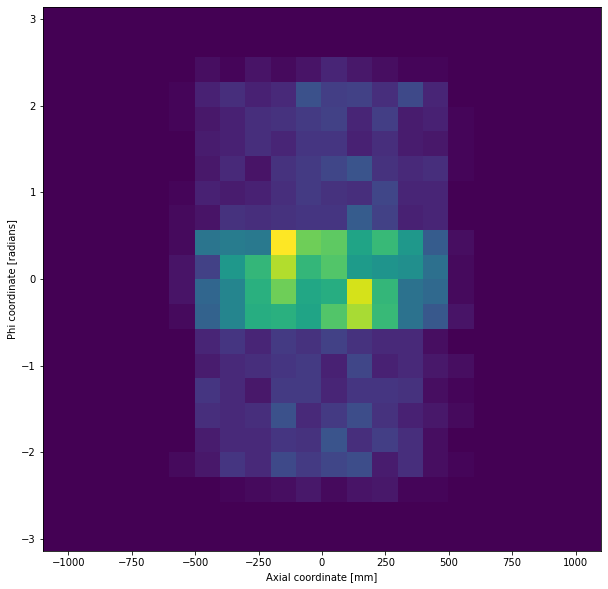

In [2]:
def ReadBackground( crystalData ):
    
    z = []
    phi = []
    energyNearSide = []
    energyFarSide = []
    for dataset in crystalData:
        for i in range( dataset.size() ):
            event = dataset.SampleOneEvent()
            for hit in event:
                phiVal = hit[4]
            
                # Ensure it's not a decay in the same crystal
                if math.fabs( phiVal ) > math.pi / 4.0:
                    z.append( hit[5] )
                    energyFarSide.append( hit[1] )
                
                    # Rotate to opposite side centred
                    phiVal -= math.pi
                    if phiVal < -math.pi:
                        phiVal += 2.0 * math.pi
                    phi.append( phiVal )
                    
                else:
                    energyNearSide.append( hit[1] )
                    
    return energyNearSide, energyFarSide, z, phi

def Make2DHistForAttenuation( z, phi ):

    print( "Detector-crossing hits: ", len(z) )
    hist = mpl.hist2d( z, phi, bins=[22,22], range=[[-1100,1100], [-math.pi,math.pi]])
    mpl.gcf().set_size_inches(10, 10)
    mpl.xlabel( "Axial coordinate [mm]" )
    mpl.ylabel( "Phi coordinate [radians]")
    mpl.show()

# Longish detector with a short PET phantom in the middle
datasetSize = 1000000
crystalData = CreateDataset( 1024, "Siemens", 100, "Siemens", datasetSize, 100.0, 900.0 )
eNear, eFar, z, phi = ReadBackground( [crystalData] )
Make2DHistForAttenuation( z, phi )

Examine the energy spectrum deposited in the orginal crystal, and in those across the detector

Total hits:  962176


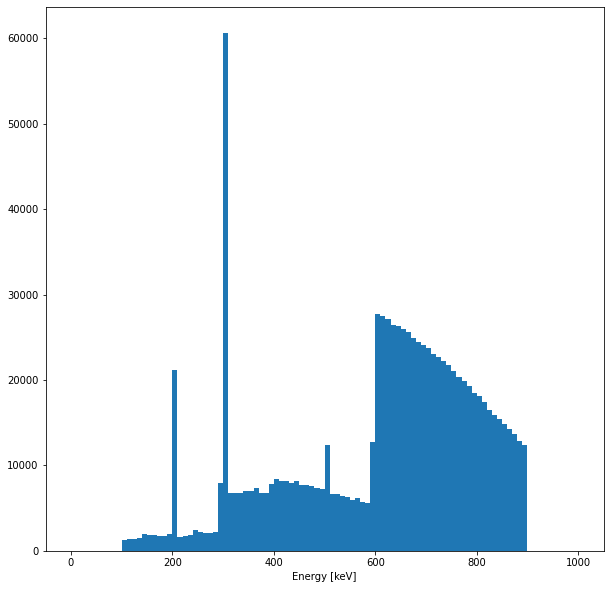

Total hits:  3067


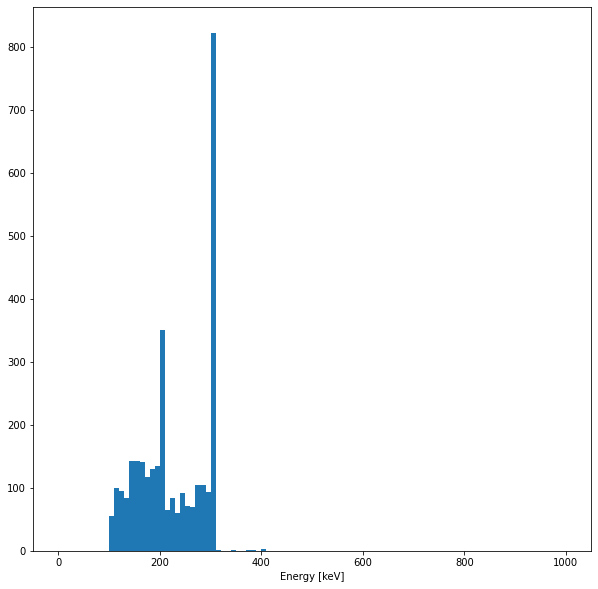

In [3]:
def MakeEnergyHist( energy ):
                
    print( "Total hits: ", len(energy) )
    hist = mpl.hist( energy, bins=100, range=[0,1000] )
    mpl.gcf().set_size_inches(10, 10)
    mpl.xlabel( "Energy [keV]" )
    mpl.show()

MakeEnergyHist( eNear )
MakeEnergyHist( eFar )

Show the spatial distribution of hits with a tighter energy window

Re-using previous simulation
231297.0 events loaded (1000000 simulated) with average 1.1983813019624119 hits/event
Detector-crossing hits:  831


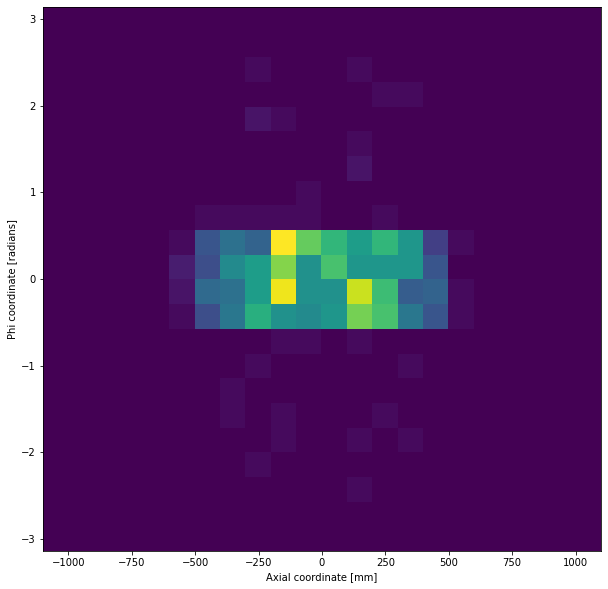

In [4]:
crystalData = CreateDataset( 1024, "Siemens", 100, "Siemens", datasetSize, 300.0, 600.0 )
eNear, eFar, z, phi = ReadBackground( [crystalData] )
Make2DHistForAttenuation( z, phi )

Show that almost no hits that cross the detector will be captured by the energy window used for clinical PET scans

Re-using previous simulation
107823.0 events loaded (1000000 simulated) with average 1.0075586841397475 hits/event
Detector-crossing hits:  0


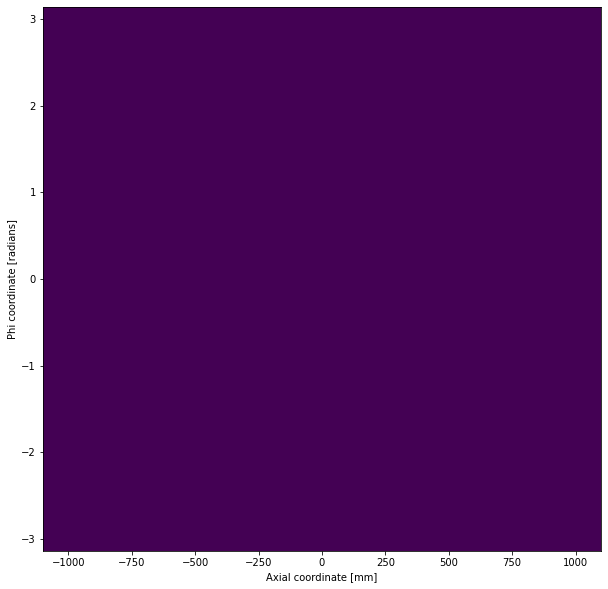

In [5]:
crystalData = CreateDataset( 1024, "Siemens", 100, "Siemens", datasetSize, 435.0, 585.0 )
eNear, eFar, z, phi = ReadBackground( [crystalData] )
Make2DHistForAttenuation( z, phi )